In [1]:
pip install pandas nltk matplotlib

In [2]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
from datetime import datetime
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data = pd.read_csv('/content/Corona.csv', encoding='latin1')

In [6]:
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family t

In [8]:
# Visualize the geographical distribution using a map
locations_map = folium.Map(location=[0, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(locations_map)

for idx, row in data.iterrows():
    if pd.notnull(row['Location']):
        folium.Marker([0, 0], popup=row['Location']).add_to(marker_cluster)

locations_map.save('locations_map.html')

<ipython-input-24-b6d530edc402>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


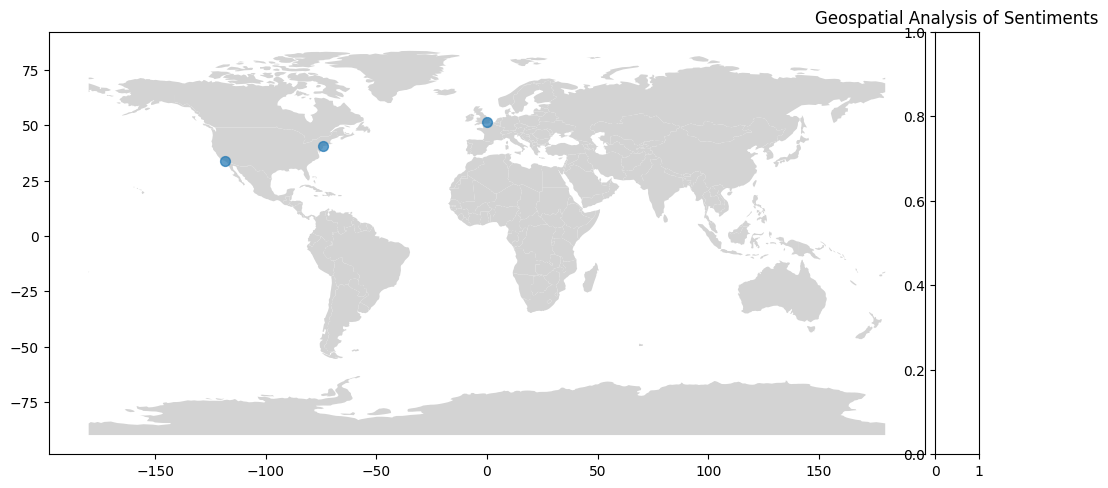

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'data' is your adjusted DataFrame with 'Latitude', 'Longitude', and 'Sentiment' columns

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot sentiments on the map
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot world map
world.plot(ax=ax, color='lightgrey')

# Plot sentiments
gdf.plot(ax=ax, markersize=50, alpha=0.7, legend=True, cax=cax, categorical=True, legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})

plt.title('Geospatial Analysis of Sentiments')
plt.show()


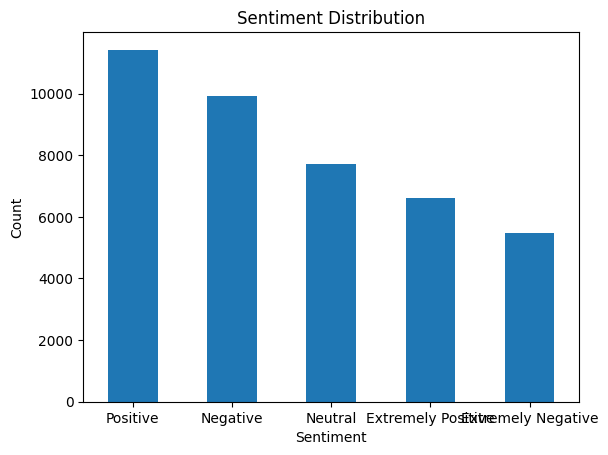

In [9]:
# Plot the distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', rot=0)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

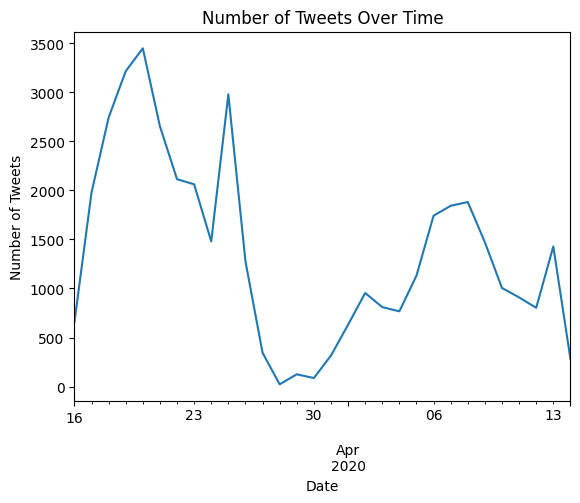

In [10]:
# Convert 'TweetAt' to datetime format
data['TweetAt'] = pd.to_datetime(data['TweetAt'], format='%d-%m-%Y')

# Plot the number of tweets over time
data.groupby('TweetAt').size().plot(legend=False)
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [11]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# Clean and tokenize tweet text
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text.lower())  # Tokenization and lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords
    return tokens

data['CleanedText'] = data['OriginalTweet'].apply(clean_and_tokenize)

In [13]:
print(data.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'CleanedText'],
      dtype='object')


In [14]:
# Display the first few rows of the dataset with cleaned text and predicted sentiments
print(data[['CleanedText', 'Sentiment']].head())

                                         CleanedText           Sentiment
0                    [menyrbie, philgahan, chrisitv]             Neutral
1  [advice, talk, neighbours, family, exchange, p...            Positive
2  [coronavirus, australia, woolworths, give, eld...            Positive
3  [food, stock, one, empty, please, dont, panic,...            Positive
4  [ready, go, supermarket, covid, outbreak, im, ...  Extremely Negative


In [15]:
import nltk

# Download the 'vader_lexicon' resource
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the 'vader_lexicon' resource
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


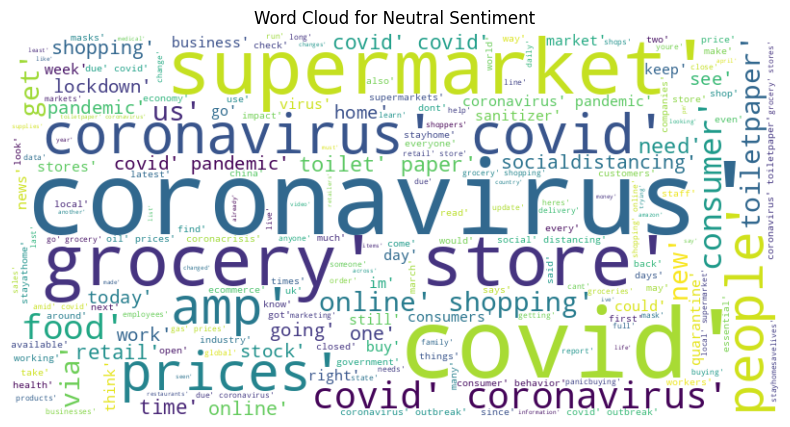

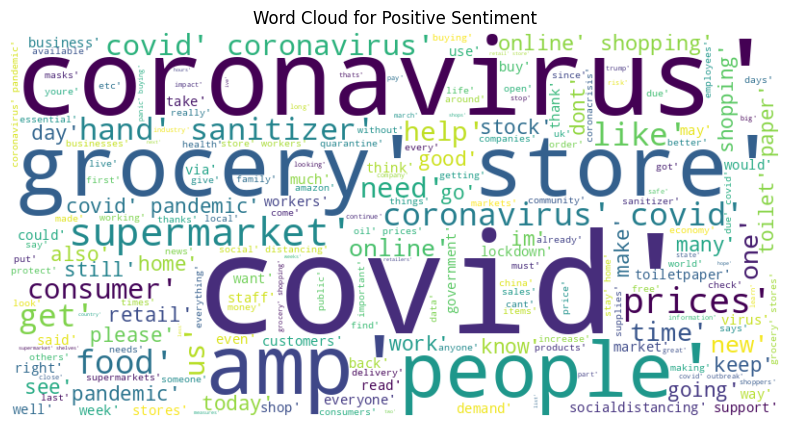

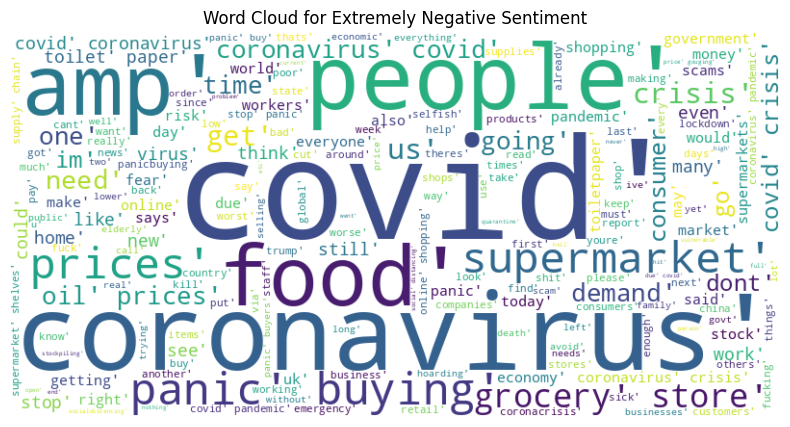

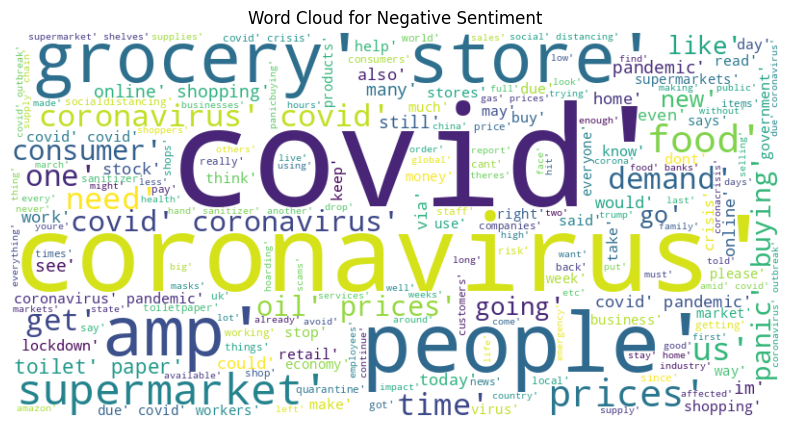

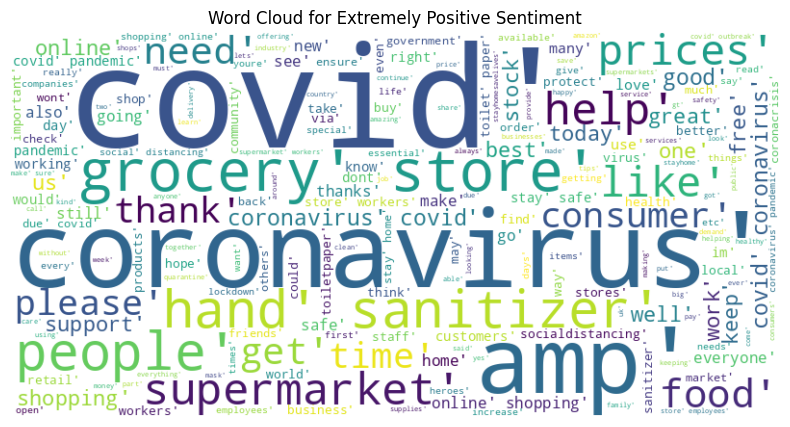

In [17]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
sentiments = data['Sentiment'].unique()

for sentiment in sentiments:
    text = ' '.join(data[data['Sentiment'] == sentiment]['CleanedText'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

In [18]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
data['Compound'] = data['OriginalTweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
data['PredictedSentiment'] = data['Compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [19]:
# Calculate sentiment scores
data['Compound'] = data['OriginalTweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
data['PredictedSentiment'] = data['Compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

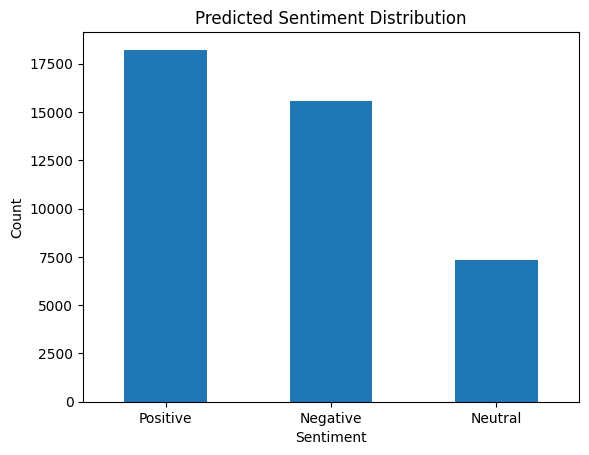

In [20]:
# Plot the distribution of predicted sentiments
predicted_sentiment_distribution = data['PredictedSentiment'].value_counts()
predicted_sentiment_distribution.plot(kind='bar', rot=0)
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [21]:
# Create a map with colored markers based on predicted sentiment
predicted_sentiment_map = folium.Map(location=[0, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(predicted_sentiment_map)

colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

for idx, row in data.iterrows():
    if pd.notnull(row['Location']):
        folium.Marker([0, 0], popup=row['Location'], icon=folium.Icon(color=colors[row['PredictedSentiment']])).add_to(marker_cluster)

predicted_sentiment_map.save('predicted_sentiment_map.html')

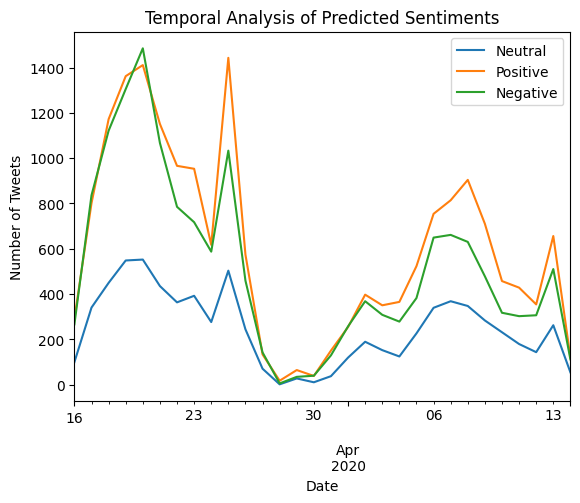

In [22]:
# Plot the number of tweets with each predicted sentiment over time
for sentiment in data['PredictedSentiment'].unique():
    sentiment_data = data[data['PredictedSentiment'] == sentiment]
    sentiment_data.groupby('TweetAt').size().plot(label=sentiment, legend=True)

plt.title('Temporal Analysis of Predicted Sentiments')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

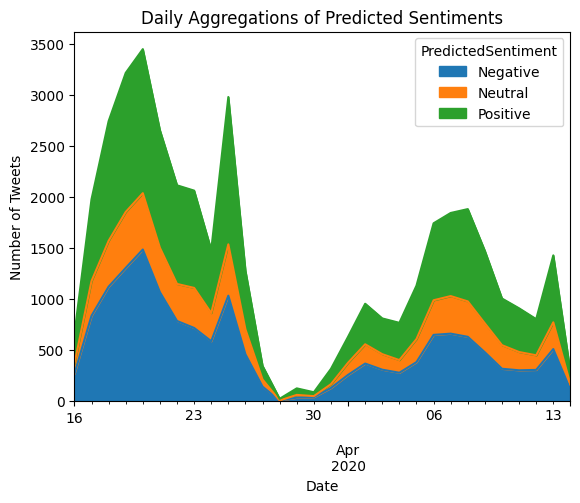

In [23]:
# Convert 'TweetAt' to datetime format
data['TweetAt'] = pd.to_datetime(data['TweetAt'], format='%d-%m-%Y')

# Calculate daily aggregations of predicted sentiments
daily_sentiment_counts = data.groupby(['TweetAt', 'PredictedSentiment']).size().unstack().fillna(0)

# Plot daily aggregations
daily_sentiment_counts.plot(kind='area', stacked=True)
plt.title('Daily Aggregations of Predicted Sentiments')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

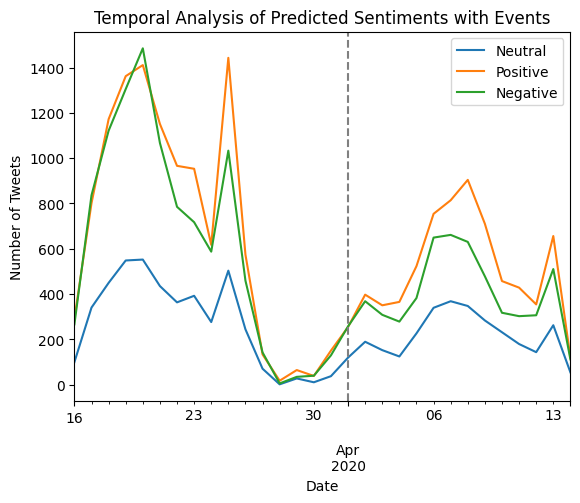

In [24]:
# Plot sentiments over time with event annotations
events = [('Event 1', '2020-03-15'), ('Event 2', '2020-04-01')]  # Adjust dates and events accordingly

for sentiment in data['PredictedSentiment'].unique():
    sentiment_data = data[data['PredictedSentiment'] == sentiment]
    sentiment_data.groupby('TweetAt').size().plot(label=sentiment, legend=True)

# Add vertical lines for events
for event, date in events:
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', label=event)

plt.title('Temporal Analysis of Predicted Sentiments with Events')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

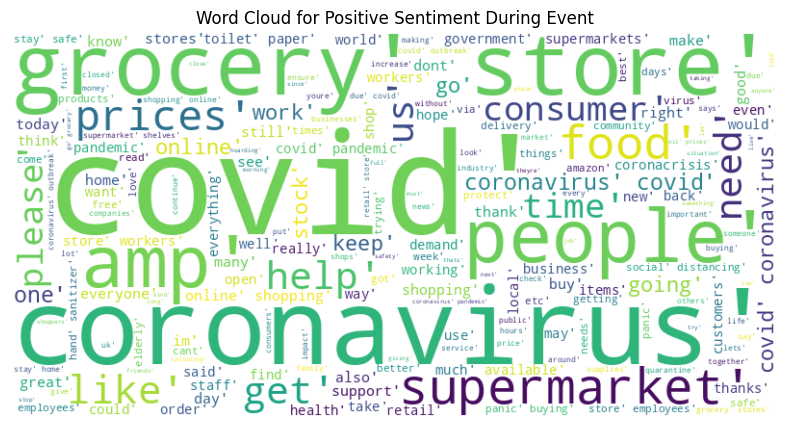

In [25]:
from wordcloud import WordCloud

# Specify the date range for the event
start_date = '2020-03-15'
end_date = '2020-03-20'

# Filter data for the specified date range and sentiment
event_data = data[(data['TweetAt'] >= start_date) & (data['TweetAt'] <= end_date) & (data['PredictedSentiment'] == 'Positive')]

# Generate word cloud for positive sentiment during the event
text = ' '.join(event_data['CleanedText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment During Event')
plt.axis('off')
plt.show()

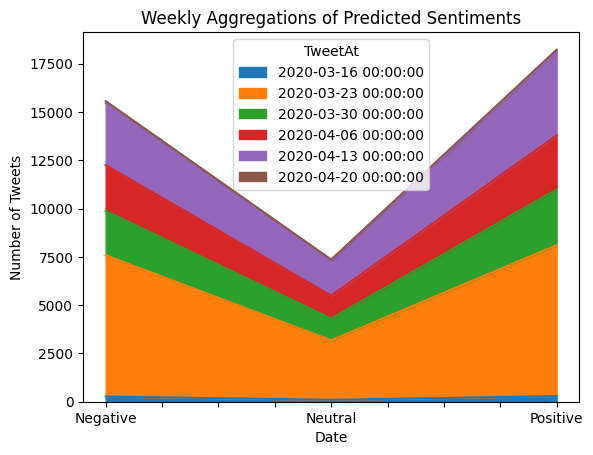

In [26]:
# Resample data to weekly frequency and plot sentiment trends
weekly_sentiment_counts = data.groupby(['PredictedSentiment', pd.Grouper(key='TweetAt', freq='W-Mon')]).size().unstack().fillna(0)

weekly_sentiment_counts.plot(kind='area', stacked=True)
plt.title('Weekly Aggregations of Predicted Sentiments')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

In [28]:
%pip install folium
%pip install pandas
%pip install matplotlib

In [30]:
unique_locations = data['Location'].unique()
print(unique_locations)

['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


In [32]:
filtered_data = data[data['Location'].str.contains(',', na=False)]

In [35]:
# Create separate columns for each sentiment
data['Positive'] = data['Sentiment'] == 'Positive'
data['Negative'] = data['Sentiment'] == 'Negative'
data['Neutral'] = data['Sentiment'] == 'Neutral'

In [37]:
print(data.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'CleanedText', 'Compound', 'PredictedSentiment',
       'Positive', 'Negative', 'Neutral'],
      dtype='object')


In [40]:
pip install geopandas matplotlib

In [43]:
print(data.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'CleanedText', 'Compound', 'PredictedSentiment',
       'Positive', 'Negative', 'Neutral'],
      dtype='object')


In [50]:
pip install geopandas folium